### Apply the k-means clustering (setk= 2) and spectral clustering algorithms (discussed in theclass) to the two-dimensional dataset stored in ‘Assignment5Dataset.csv’.  Try using differ-ent values of epsilon while preparing the epsilon neighbourhood similarity graph for spectral clustering.Visualize the clusters obtained using each of the methods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("Assignment5Dataset.csv")
dataset

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


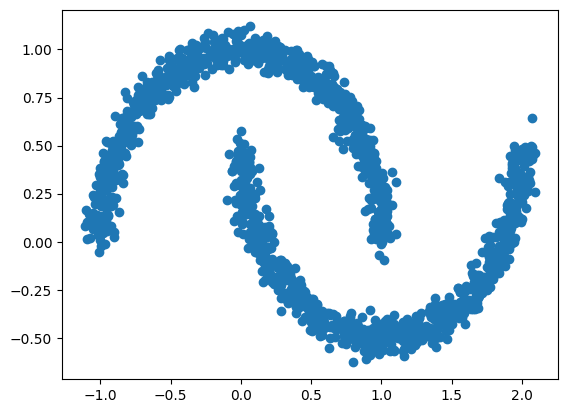

In [3]:
plt.scatter(dataset['X1'], dataset['X2'])

In [4]:
print("mean x1", np.mean(dataset['X1']))
print("mean x2", np.mean(dataset['X2']))
print("max x1", np.max(dataset['X1']))
print("min X1", np.min(dataset['X1']))

print("max x2", np.max(dataset['X2']))
print("min X2", np.min(dataset['X2']))

mean x1 0.4985009647178948
mean x2 0.25174274544695474
max x1 2.0950984608752496
min X1 -1.1123394955099284
max x2 1.119579836548932
min X2 -0.6283971714938869


#### points are uniform between -1 and 2

In [5]:
k = 2
clusters =  np.random.uniform(-1,2,size = (2,2))

In [6]:
clusters

array([[ 1.81553068, -0.02043133],
       [ 0.18314128,  1.43368711]])

In [7]:
clusters[0]

array([ 1.81553068, -0.02043133])

In [8]:
n = dataset.shape[0]

In [9]:
A = np.random.randint(2, size=n)
Anew = np.random.randint(2, size=n)
for p in range(0,500):
    A = Anew
    for i in range(0,n):
        mindist = float('inf')
        mindistk = 0
        for j in range(0,k):
            dist = np.linalg.norm(dataset.iloc[i,[0,1]] - clusters[j])
            if(dist < mindist):
                mindist = dist
                mindistk = j
        Anew[i] = mindistk
    dataset['c'] = Anew.tolist()
    clusters[0] = np.array(np.mean(dataset[dataset['c'] == 0]))[np.array([0,1])]
    clusters[1] = np.array(np.mean(dataset[dataset['c'] == 1]))[np.array([0,1])]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

In [10]:
dataset

,X1,X2,c
0,0.674362,-0.444625,0
1,1.547129,-0.239796,0
2,1.601930,-0.230792,0
3,0.014563,0.449752,1
4,1.503476,-0.389164,0
...,...,...,...
1495,1.957344,0.187184,0
1496,0.962394,0.384304,0
1497,-0.761893,0.581666,1
1498,1.803858,-0.154705,0


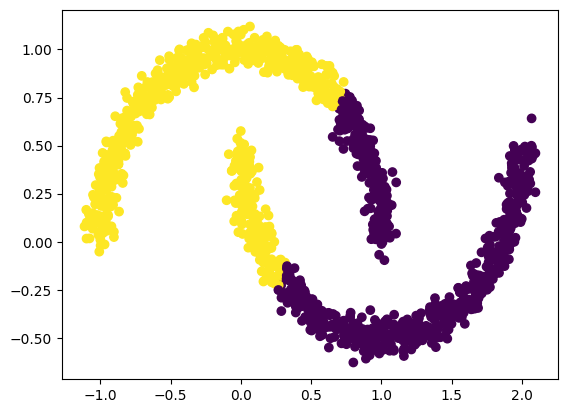

In [11]:
plt.scatter(dataset['X1'],dataset['X2'], c = dataset['c'])

### Try to make data linearly seprable in higher dimensions

In [12]:
dataset['X3'] = dataset['X1']**2 + dataset['X2']**2
dataset['X4'] = dataset['X1']**2
dataset['X5'] = dataset['X2']**2
dataset['X6'] = dataset['X1'] * dataset['X2']

In [13]:
del dataset['c']


In [14]:
k = 2
clusters =  np.random.uniform(-3,3,size = (2,6))

In [15]:
n = dataset.shape[0]

In [16]:
A = np.random.randint(2, size=n)
Anew = np.random.randint(2, size=n)
for p in range(0,500):
    A = Anew
    for i in range(0,n):
        mindist = float('inf')
        mindistk = 0
        for j in range(0,k):
            dist = np.linalg.norm(dataset.iloc[i,[0,1,2,3,4,5]] - clusters[j])
            if(dist < mindist):
                mindist = dist
                mindistk = j
        Anew[i] = mindistk
    dataset['c'] = Anew.tolist()
    clusters[0] = np.array(np.mean(dataset[dataset['c'] == 0]))[np.array([0,1,2,3,4,5])]
    clusters[1] = np.array(np.mean(dataset[dataset['c'] == 1]))[np.array([0,1,2,3,4,5])]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

In [17]:
newdataset = dataset[['X1','X2','c']]

In [18]:
newdataset

,X1,X2,c
0,0.674362,-0.444625,1
1,1.547129,-0.239796,0
2,1.601930,-0.230792,0
3,0.014563,0.449752,1
4,1.503476,-0.389164,0
...,...,...,...
1495,1.957344,0.187184,0
1496,0.962394,0.384304,1
1497,-0.761893,0.581666,1
1498,1.803858,-0.154705,0


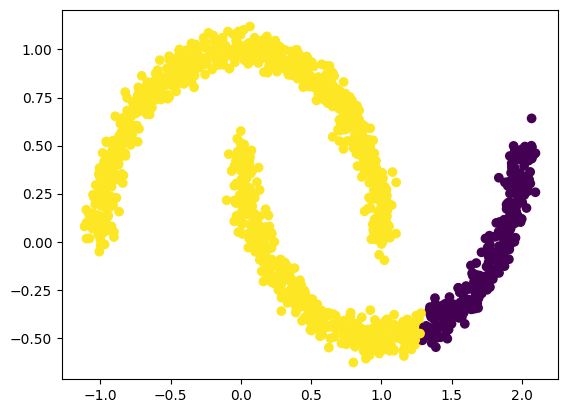

In [19]:
plt.scatter(dataset['X1'],dataset['X2'], c = dataset['c'])

## Spectral clustering

## constructing e-neiborhood graph

In [20]:
dataset = dataset[['X1','X2']]
dataset

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


In [21]:
similaritymat = np.zeros((n,n))

In [22]:
epsilon = 0.3
for i in range(0,n):
    for j in range(0,n):
        dist = np.linalg.norm(dataset.iloc[i,[0,1]] - dataset.iloc[j,[0,1]])
        if(dist<epsilon):
            similaritymat[i][j] = dist
        else:
            similaritymat[i][j] = 0

In [23]:
similaritymat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05553513, ..., 0.        , 0.27046286,
        0.        ],
       [0.        , 0.05553513, 0.        , ..., 0.        , 0.21578773,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.27046286, 0.21578773, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
degreemat = np.zeros((n,n))

In [25]:
for i in range(0,n):
    degreemat[i][i] = np.count_nonzero(similaritymat[i] == 1)

In [26]:
degreemat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
laplasmat = np.subtract(degreemat,similaritymat)
laplasmat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.05553513, ...,  0.        ,
        -0.27046286,  0.        ],
       [ 0.        , -0.05553513,  0.        , ...,  0.        ,
        -0.21578773,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.27046286, -0.21578773, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
eigenval, eigenvector = np.linalg.eig(laplasmat)

In [29]:
eigenvector.shape

(1500, 1500)

In [30]:
import scipy

In [31]:
eigenval = np.sort(eigenval)
ei = eigenval[1]

In [32]:
values, vectors = scipy.sparse.linalg.eigs(laplasmat, k=1, sigma=ei)

In [33]:
values

array([-22.54994036+0.j])

In [34]:
vectors

array([[ 1.22493189e-04+0.j],
       [ 9.91290926e-05+0.j],
       [ 9.79997101e-05+0.j],
       ...,
       [-3.23065319e-02+0.j],
       [ 6.93816530e-05+0.j],
       [ 9.73635944e-05+0.j]])

In [35]:
ev = vectors

In [36]:
classes = np.zeros((1,n))
classes

array([[0., 0., 0., ..., 0., 0., 0.]])

In [37]:
for i in range(0,n):
    if(ev[i] < 0):
        classes[0][i] = 0
    else:
        classes[0][i] = 1

In [38]:
dataset['c'] = classes[0].tolist()
dataset

<ipython-input-38-58ecd1f27ddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['c'] = classes[0].tolist()


,X1,X2,c
0,0.674362,-0.444625,1.0
1,1.547129,-0.239796,1.0
2,1.601930,-0.230792,1.0
3,0.014563,0.449752,1.0
4,1.503476,-0.389164,1.0
...,...,...,...
1495,1.957344,0.187184,1.0
1496,0.962394,0.384304,0.0
1497,-0.761893,0.581666,0.0
1498,1.803858,-0.154705,1.0


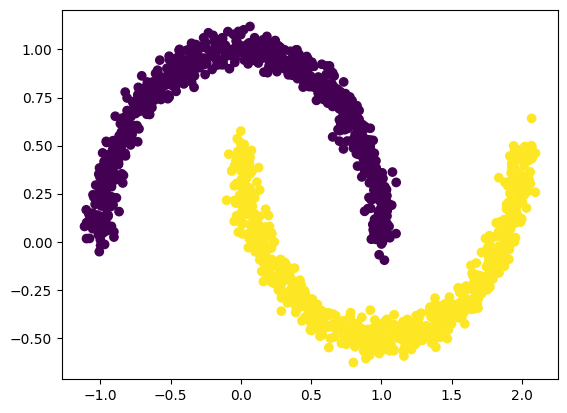

In [39]:
plt.scatter(dataset['X1'],dataset['X2'], c = dataset['c'])

In [40]:
import numpy as np

In [41]:
A = np.random.randint(5, size=100)
Anew = np.random.randint(2, size=100)


In [42]:
A

array([3, 0, 0, 0, 3, 1, 2, 4, 0, 3, 0, 3, 4, 2, 1, 4, 3, 3, 2, 1, 2, 1,
       4, 1, 2, 0, 0, 3, 1, 4, 0, 0, 3, 4, 0, 4, 2, 4, 1, 2, 1, 3, 4, 3,
       1, 2, 1, 1, 3, 0, 4, 1, 2, 3, 2, 2, 0, 3, 0, 4, 0, 0, 4, 4, 0, 1,
       2, 4, 1, 0, 2, 2, 3, 4, 3, 2, 1, 2, 3, 1, 0, 3, 0, 2, 2, 4, 0, 3,
       4, 1, 2, 2, 4, 2, 3, 4, 2, 3, 4, 1])

In [43]:
k = 2
clusters =  np.random.uniform(-1,2,size = (2,2))

In [44]:
clusters

array([[ 0.75024393, -0.02474859],
       [ 1.23326197,  1.6398761 ]])